# Plotting in base R

In the previous lab, we discovered that frequency tables are a useful starting point for exploring the distribution of categorical data. However, they are not ideal for numeric data due to the large number of unique values numeric data can take. To better explore and communicate insights from numeric data, data visualizations become an essential tool. R offers a straightforward yet potent set of built-in graphics functions that allow you to create plots with minimal code. While the plots produced by R's base graphics functions might not be the most aesthetically pleasing, they serve well for quick and informal exploratory analysis.

Before we proceed, we will load the ggplot2 package for R. ggplot2 is a graphics package that offers powerful plotting capabilities beyond R's base functions. 

In [1]:
library(ggplot2)
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


The provided output reveals that the dataset consists of 10 features concerning 53,940 distinct diamonds. These features encompass both numeric and ordered categorical variables. To begin, we will revisit a few plotting functions we have previously encountered: hist() and boxplot().

# Histograms

A histogram is a type of univariate plot used to display the distribution of a numeric variable by grouping it into bins and showing the frequency of observations within each bin. It provides valuable insights into the distribution of the data. To understand the distribution of diamond carat weight, we can create a histogram using the hist() function.

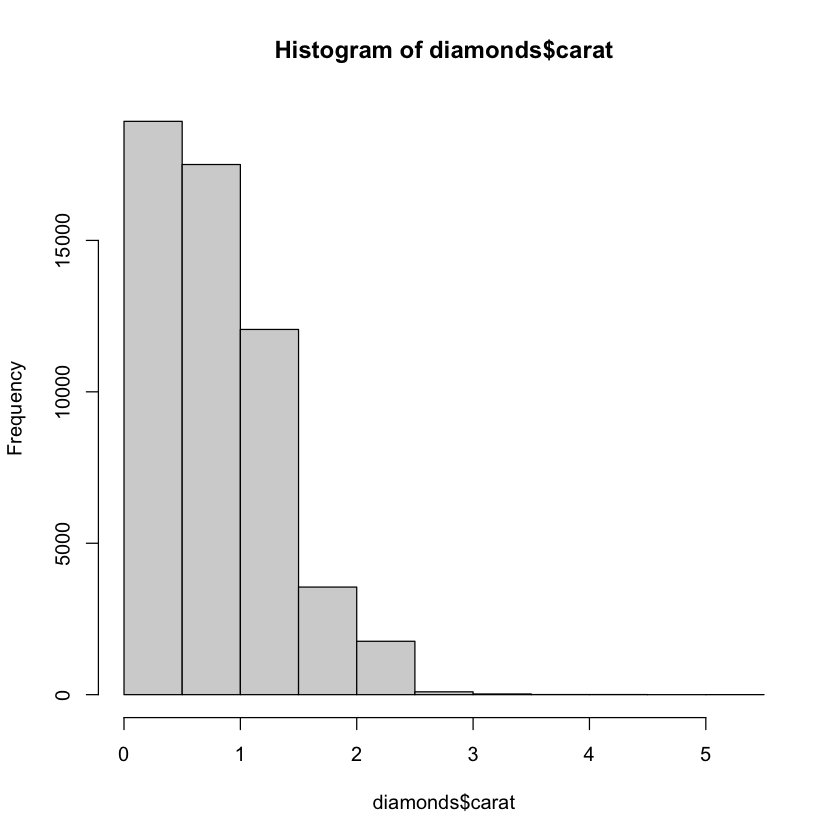

In [2]:
hist(diamonds$carat)

>Please note that when you generate a plot in your local RStudio environment, it will be displayed in the bottom right pane under the "plots" tab. You can navigate through the plots you've created using the left and right arrows.

Upon observing the plot, we can immediately notice that the carat weights exhibit positive skewness. The majority of diamonds have a carat weight of approximately 1 or lower, but there are some extreme cases of larger diamonds.

In the above plot, the bins are quite wide, and there doesn't seem to be any data beyond a carat size of 3.5. To extract more information from our histogram, we can experiment with additional arguments to control the bin size and set limits for the x-axis.

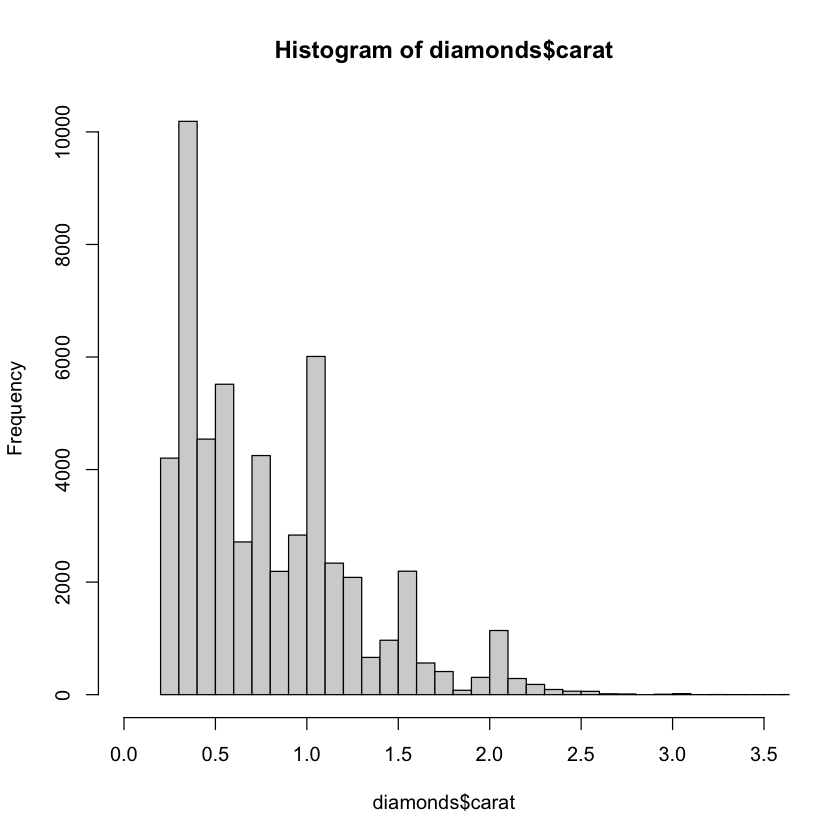

In [3]:
hist(diamonds$carat,
     breaks = 50,       # Group into 50 bins
     xlim = c(0,3.5))   # Limit the X-axis to the range 0-3.5

The histogram provides valuable insights into certain nuances within the distribution, but we cannot guarantee that it encompasses all the data. By restricting the X-axis to 3.5, it is possible that some outliers with extremely low counts might have been excluded, resulting in them not being visible as bars on the initial chart. To address this, let's investigate if there are any diamonds larger than 3.5 carats in the dataset.

In [4]:
subset(diamonds, carat > 3.5)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.65,Fair,H,I1,67.1,53,11668,9.53,9.48,6.38
4.01,Premium,I,I1,61.0,61,15223,10.14,10.10,6.17
4.01,Premium,J,I1,62.5,62,15223,10.02,9.94,6.24
4.00,Very Good,I,I1,63.3,58,15984,10.01,9.94,6.31
3.67,Premium,I,I1,62.4,56,16193,9.86,9.81,6.13
4.13,Fair,H,I1,64.8,61,17329,10.00,9.85,6.43
5.01,Fair,J,I1,65.5,59,18018,10.74,10.54,6.98
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72
3.51,Premium,J,VS2,62.5,59,18701,9.66,9.63,6.03


Interestingly, we find that there are 9 diamonds in our dataset that exceed 3.5 carats. Should we consider removing these diamonds from our analysis? On one side, these outliers have minimal influence on the overall distribution's shape. However, if we restrict the X-axis to 3.5, it may create an impression that no data exists beyond that point. While this isn't a concern for our exploratory analysis, it could lead to misinterpretation when presenting the plot to others. To address this, adding a note stating that 9 diamonds lie beyond the chart range could be beneficial.

# Boxplots

Boxplots provide a graphical representation to summarize the distribution of numeric data in a univariate manner. Now, we will create a boxplot specifically for the "carat" variable.

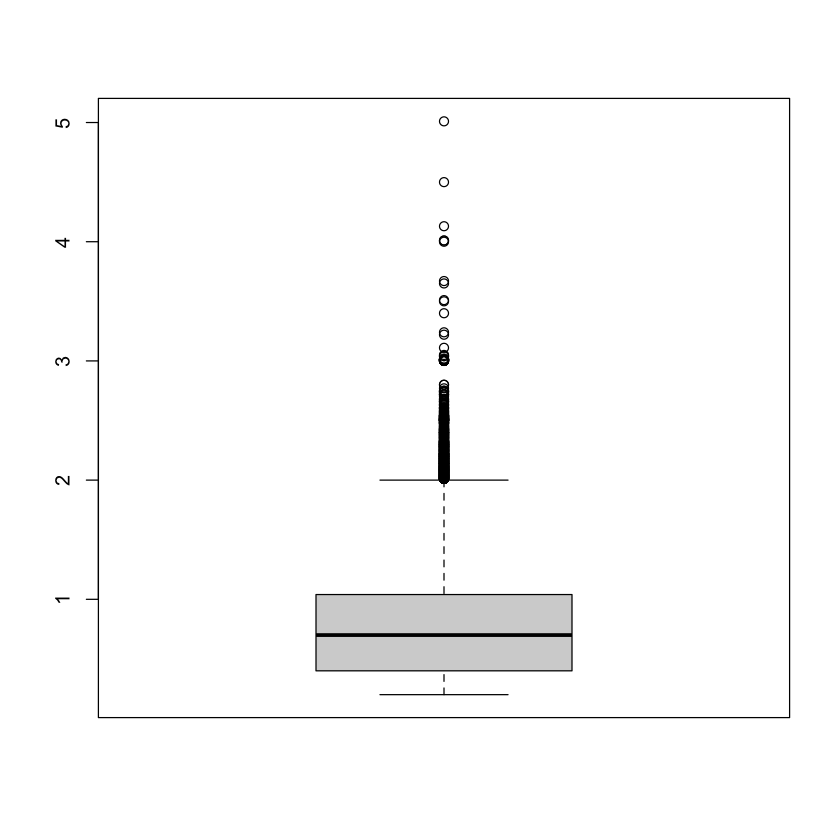

In [5]:
boxplot(diamonds$carat)

We learned about boxplots and their components. The central box in a boxplot represents the middle 50% of the data, with the central bar representing the median. The bars at the ends of the dotted lines (whiskers) encompass the majority of observations, while any circles lying beyond the whiskers may indicate potential outliers.

In our current dataset, which contains over 50,000 observations, we notice numerous data points beyond the top whisker. While not all of these points should be classified as outliers, the diamonds with a carat weight of 4 and above are notably far from the norm.

One valuable feature of the boxplot() function is its ability to create side-by-side boxplots. These plots split a numeric variable based on a categorical variable, generating distinct boxplots for each category. Now, let's proceed with creating a side-by-side boxplot of diamond price, categorized by diamond clarity.

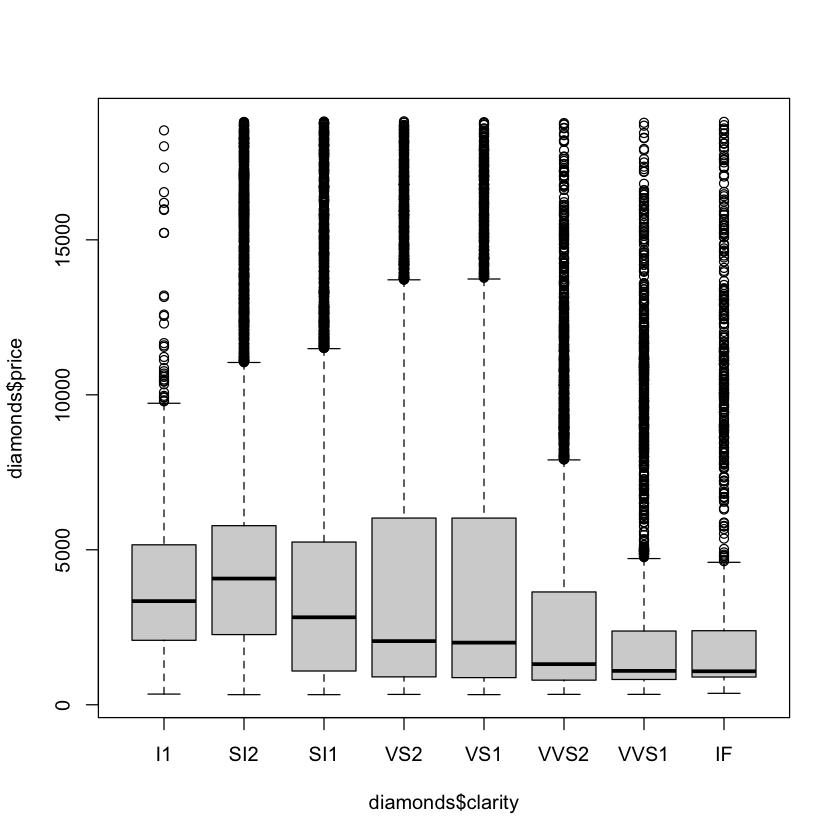

In [6]:
boxplot(diamonds$price ~ diamonds$clarity)  # Plot price split on clarity*

*Please note that this is our first R example using a formula. In R, a formula represents the relationship between variables, guiding certain functions on how to use the variables. The response or dependent variable is placed before a "~" symbol, followed by one or more explanatory variables. In this instance, the formula is essentially instructing R to create a boxplot of price based on clarity.*

The displayed boxplot raises curiosity as one would expect diamonds with better clarity to command higher prices. Surprisingly, diamonds at the highest end of the clarity spectrum (IF = internally flawless) exhibit lower median prices compared to low clarity diamonds. To gain further insight into this situation, we might consider examining another boxplot.

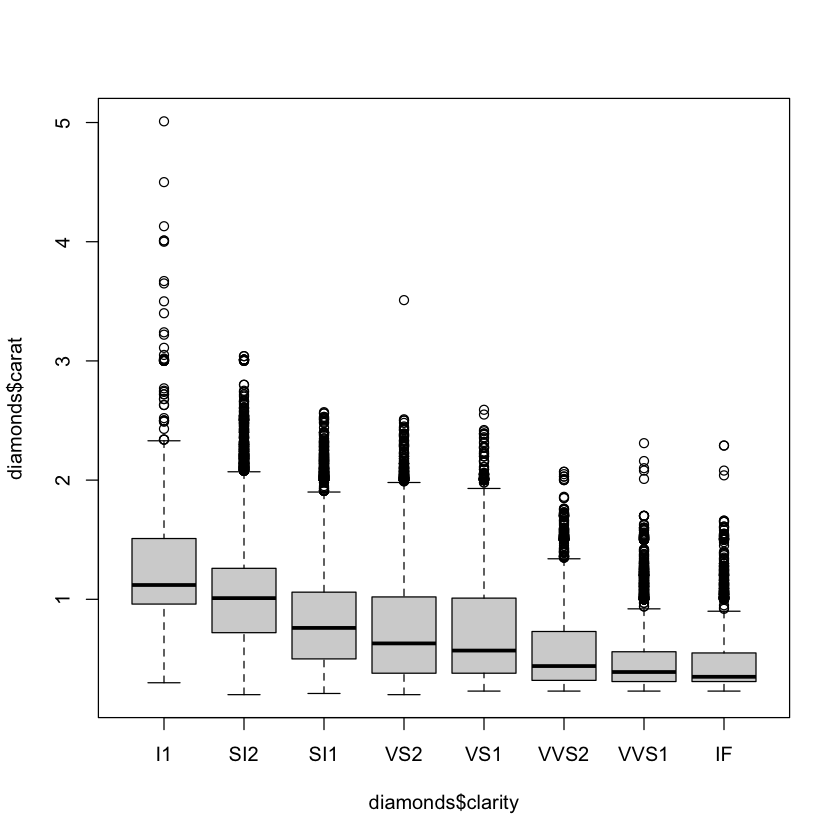

In [7]:
boxplot(diamonds$carat ~ diamonds$clarity)   # Plot of carat split on clarity

The depicted plot indicates a correlation between larger diamond size and lower clarity ratings. Considering that diamond size significantly influences its value, it is reasonable to observe higher median prices for diamonds with lower clarity ratings.

# Density Plots

A density plot displays the distribution of a numeric variable using a continuous curve, resembling a histogram but without discrete bins. Unlike histograms, density plots provide a more accurate representation of the underlying distribution shape. To create a density plot, you can generate a density estimate using the density() function and then visualize the result using the plot() function.

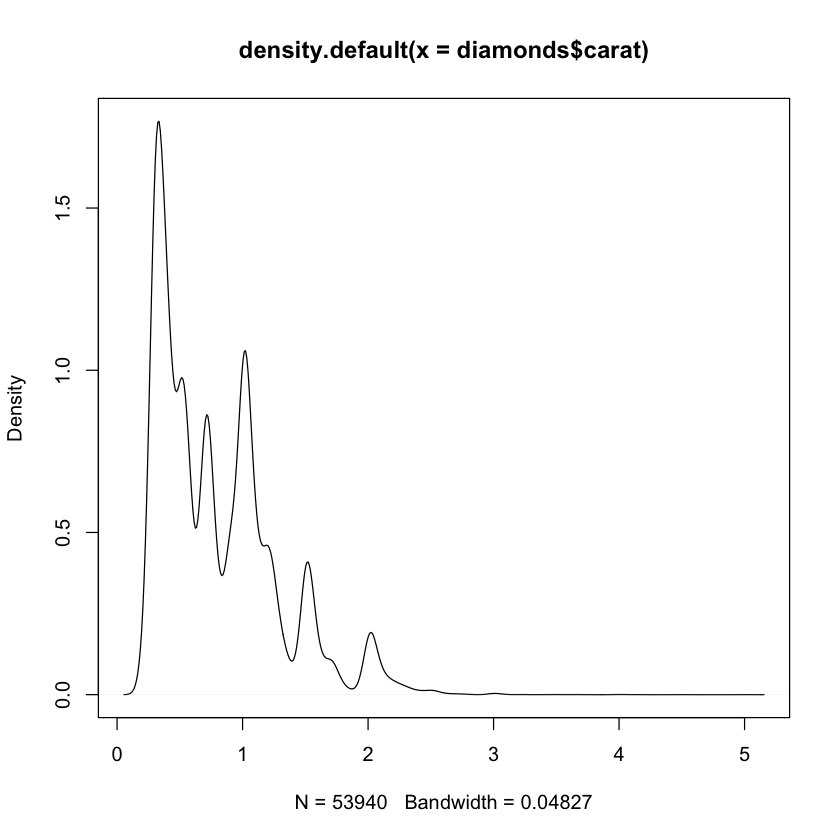

In [8]:
plot(density(diamonds$carat))

# Barplots

Barplots are graphical representations used to visually depict the frequency counts of categorical variables. To generate a barplot, you can first create a table summarizing the categorical variable and then pass this table as input to the barplot() function.

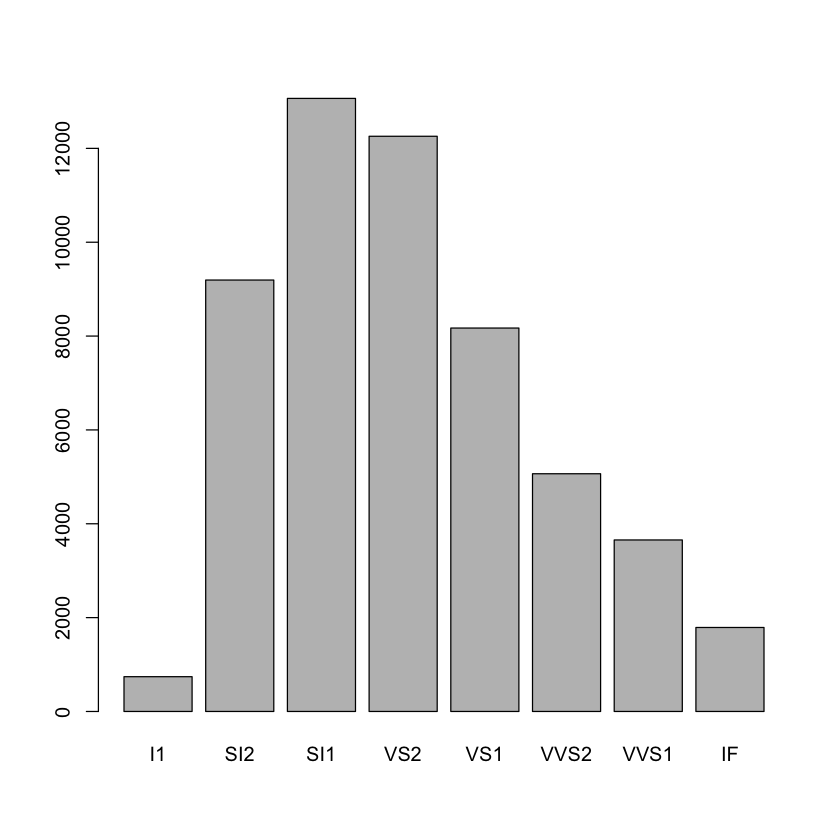

In [9]:
barplot( table(diamonds$clarity) ) 

By incorporating a second categorical variable into the table used for creating a barplot, you can generate a stacked barplot. Stacked barplots visually display the distribution of this additional categorical variable within each bar.

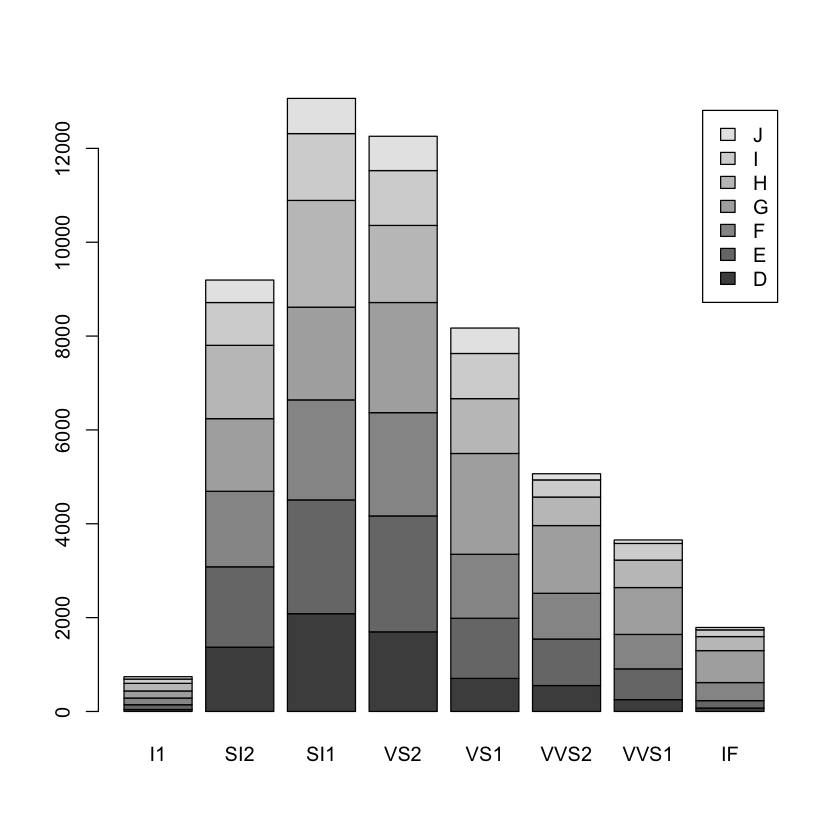

In [10]:
# Generate a stacked barplot to visualize the distribution of clarity across different diamond colors.

barplot( table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color))               # Add a legend for diamond colors

A grouped barplot provides an alternative representation to a stacked barplot, where each stacked section is displayed within its own individual bar. To create a grouped barplot, begin by generating a stacked barplot and then include the additional argument "beside = TRUE".

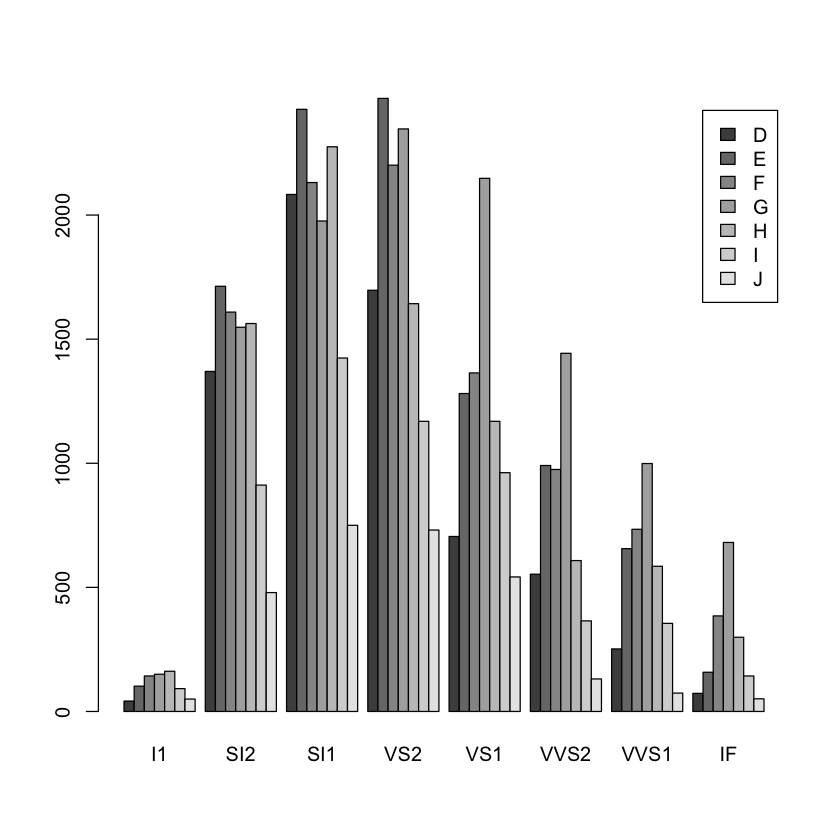

In [11]:
# Generate a barplot that groups data based on clarity and color.

barplot( table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color),           
       beside = TRUE)                             # Group instead of stacking

# Scatterplots

Scatterplots represent bivariate (two-variable) plots, where two numeric variables are plotted as data points on the x/y plane. In lesson 15, we encountered an instance of scatterplots while generating a scatter plot matrix for the mtcars dataset using the pairs() function. To create an individual scatterplot, you can utilize the plot() function by providing two numeric variables as input.

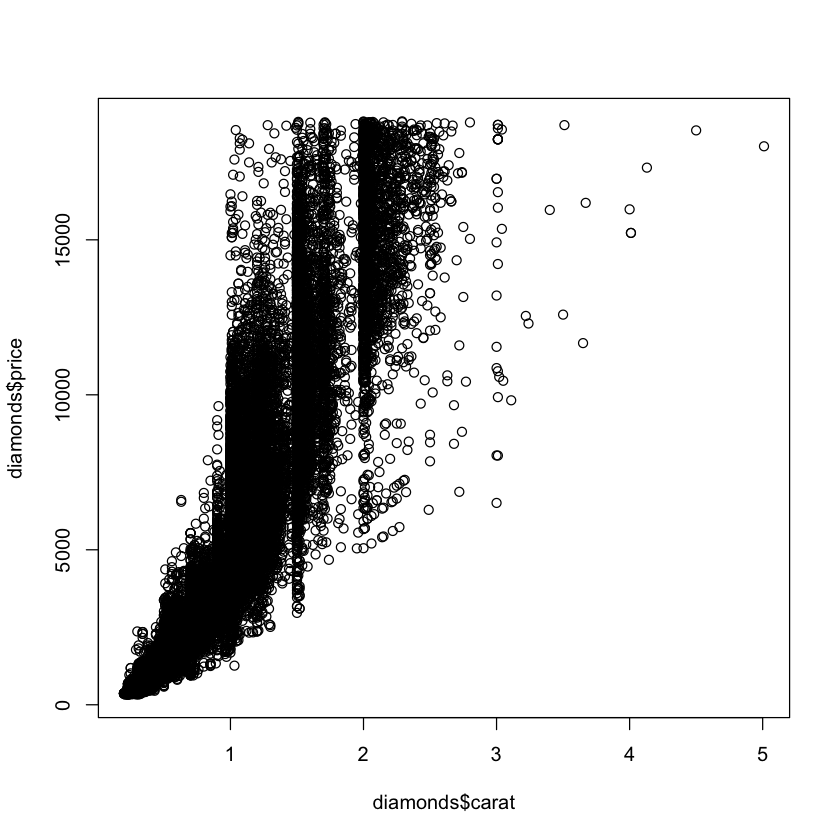

In [12]:
plot(diamonds$carat, 
     diamonds$price)   # Scatter plot of carat and price

Despite the numerous overlapping points in the scatterplot above, it provides valuable insights into the correlation between diamond carat weight and price, indicating that larger diamonds tend to be more expensive. To enhance the visualization of data with overlapping points, you can introduce transparency to the plot. This can be achieved by including an extra argument in the plot command and setting the alpha parameter to the desired opacity percentage. By doing so, you can create a clearer representation of the data with overlapping points.

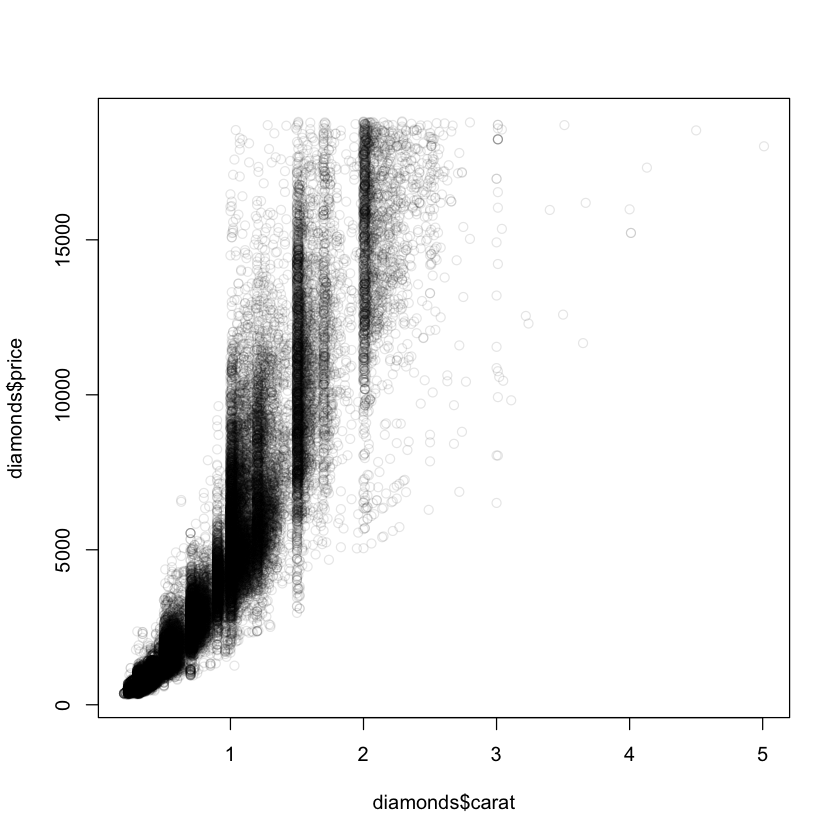

In [13]:
# Recreate the plot above, but use the col option with rgb() to set alpha
plot(diamonds$carat, 
     diamonds$price,
     col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))

The scatterplot with transparency reveals distinct "bands" of diamonds cut to common carat weights, such as 1, 1.5, and 2 carats, more effectively.

# Line Plots

Line plots are graphical representations that depict the variation in a numeric variable concerning another ordered variable. They are commonly employed for visualizing time series data to illustrate the progression of a variable over time. To construct a line plot, you can utilize the plot() function, passing two variables and specifying the type as "l" in the arguments.

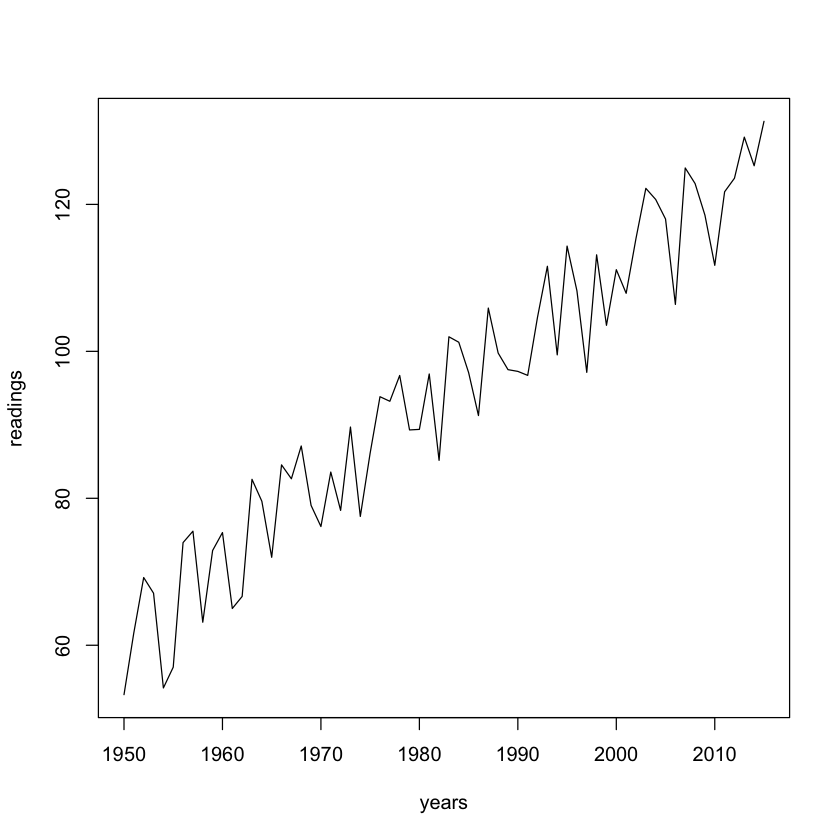

In [14]:
years <- seq(1950,2015,1)                # Create some dummy data
readings <- (years-1900) + runif(66,0,20)

plot(years, readings, type="l")          # Make a line plot of the data

# Plot Parameters

Up to this point, we have explored various types of plots; however, we haven't focused much on improving their visual presentation. R's plotting functions offer numerous additional parameters that allow you to customize plots by adding titles, labeling axes, and enhancing their aesthetics. Let's recreate one of our previous plots to demonstrate some of these parameter settings and make it more visually appealing.

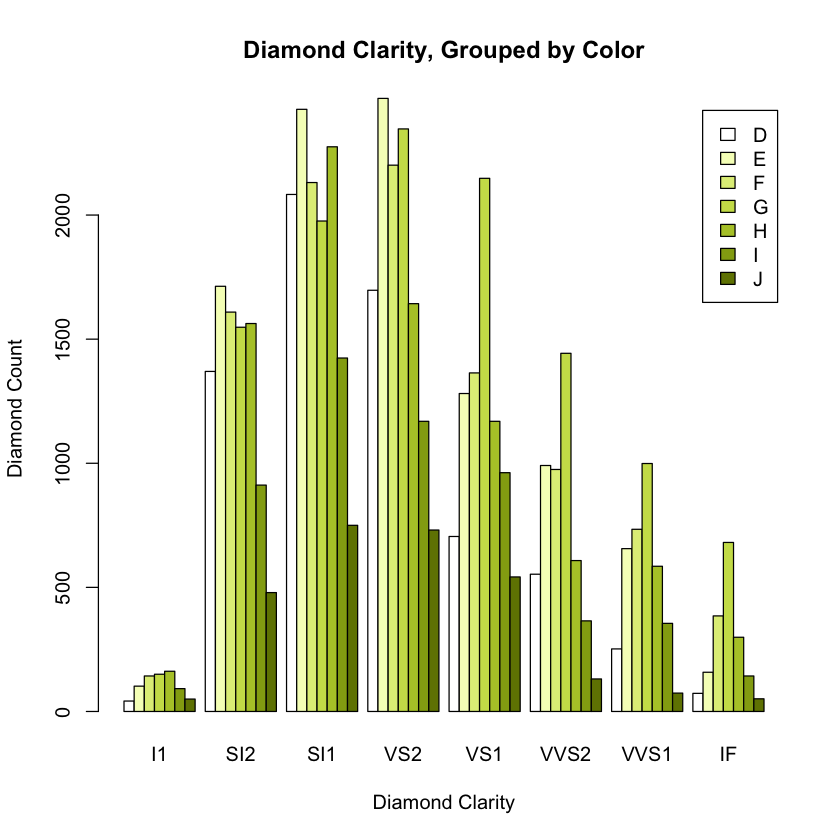

In [15]:
# Remake the grouped barplot
barplot(table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color),           
       beside = TRUE,
       xlab = "Diamond Clarity",                      # Add a label to the X-axis
       ylab = "Diamond Count",                        # Add a label to the Y-axis
       main = "Diamond Clarity, Grouped by Color",    # Add a plot title
       col = c("#FFFFFF","#F5FCC2","#E0ED87","#CCDE57",     # Add color*
              "#B3C732","#94A813","#718200") )

*Please note that there are various methods to specify colors, such as using names like "red," "blue," etc., hexadecimal color codes as demonstrated above, and built-in color ranges like heat.colors() and terrain.colors().*

While we won't cover all the potential plot parameters in this lesson, keep in mind that you can always access function documentation using the help() function to explore further.

# Adding Features to Plots

Once you have generated a plot, you have the option to enhance it by incorporating additional elements such as points, lines, text, and a legend. Let's now take our existing series plot and embellish it to make it visually appealing.

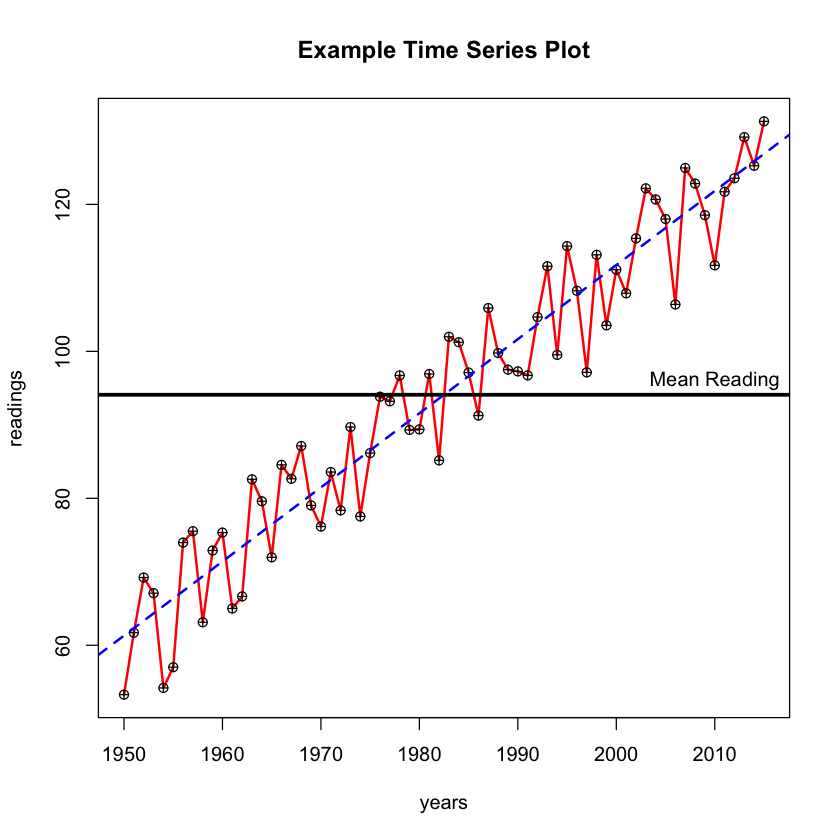

In [16]:
plot(years, readings, type="l", 
                      col="red",                            # Color the line red
                      lwd="2",                              # Increase line width
                      main= "Example Time Series Plot")     # Add plot title   

points(x = years, y = readings,    # Draw points at specified coordinates
        pch=10 )                   # Set point symbol

abline(a = mean(readings),         # Draw a line with Y-intercept a
       b= 0,                       # And slope b
       lwd="3")                    # Set line width

text(x=2010, y=mean(readings)+2,   # Add text at specified coordinates           
     labels="Mean Reading")        # Text to add

abline( lm(readings ~ years),      # Create a line based on a linear model*
       col = "blue",               # Set color
       lty = "dashed",             # Set line type
       lwd = 2)                    # Set line width

*Please note that the lm() function is utilized to construct a linear model using the provided formula. Here, we create a model to predict readings based on years. We will delve deeper into lm() in an upcoming lesson.*

As demonstrated, R's base plotting functions can generate visually appealing plots when you invest effort in setting additional parameters and incorporating supplementary elements.

# Wrap Up

In R, you can utilize a straightforward yet powerful collection of basic graphical functions to swiftly explore your data. Although they may not always produce visually appealing plots, they are functional and get the job done. However, if you seek more advanced features and improved aesthetics in your plots, it is advisable to opt for a specialized graphics package like ggplot2.

## Exercises

To complete the exercises, you should fill in the code boxes as per the instructions provided and then run the code.

### Exercise #1

Begin by loading the titanic training dataset, and then proceed to generate a histogram for the 'Age' variable with 30 bins, using the 'breaks = 30' parameter.

In [17]:
titanic_train <- read.csv("../data/titanic/train.csv")

"Your code here!"

[1] "Your code here!"

### Exercise #2
Generate a boxplot for the Fare variable. Are there any outliers that catch your attention?

In [18]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #3
Generate a scatterplot displaying Age on the x-axis and Fare on the y-axis. Restrict the y-axis range to be between 0 and 100. Explore whether there is any noticeable correlation or connection between Age and Fare paid.

In [19]:
"Your code here!"

[1] "Your code here!"

## Exercise Solutions

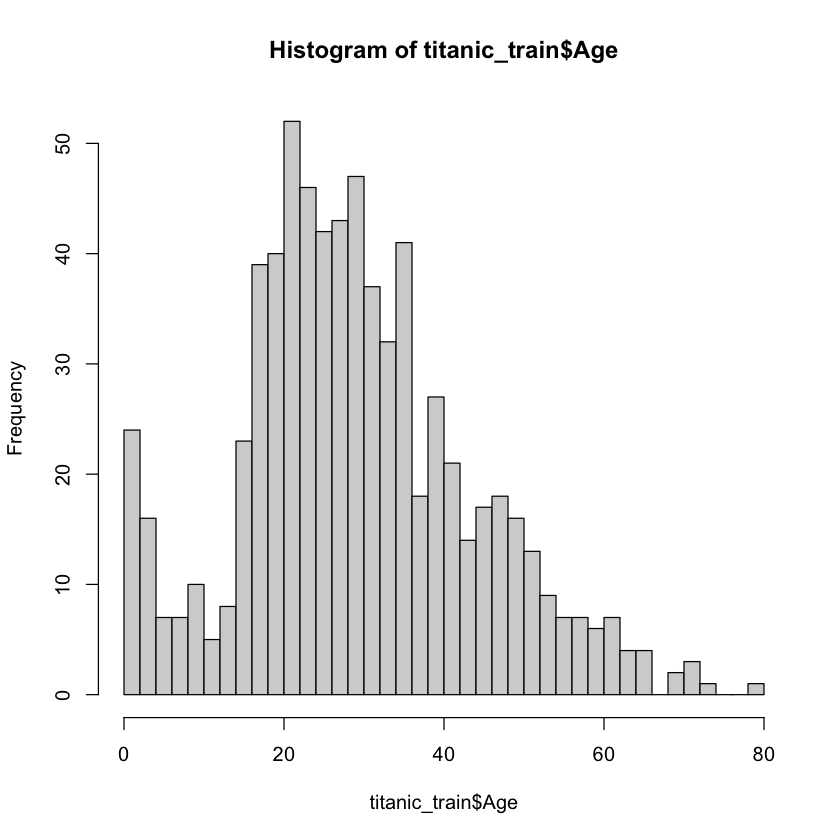

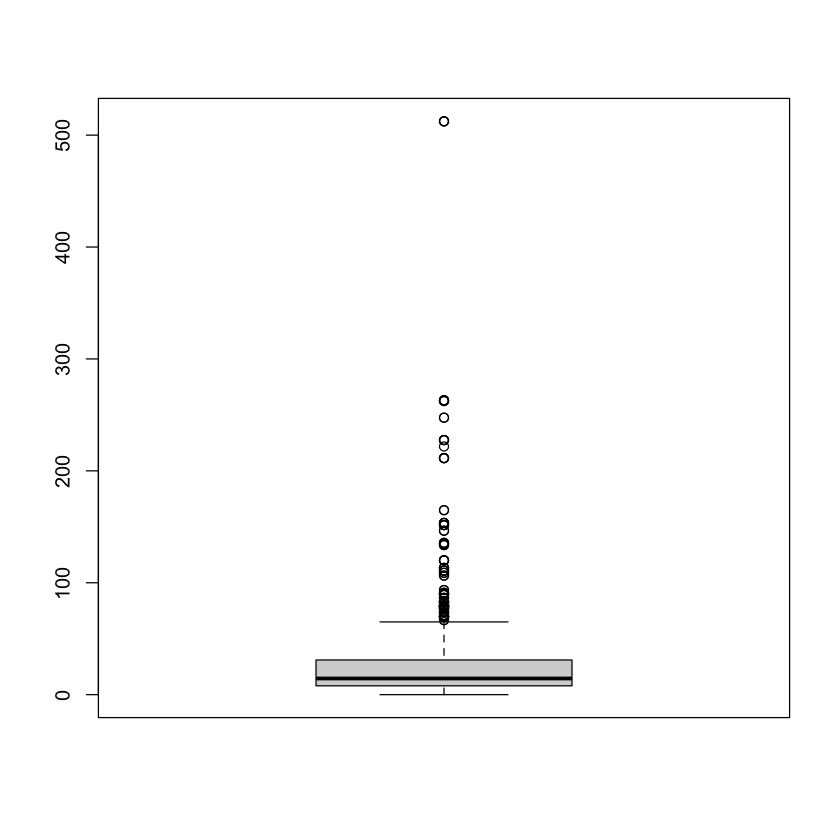

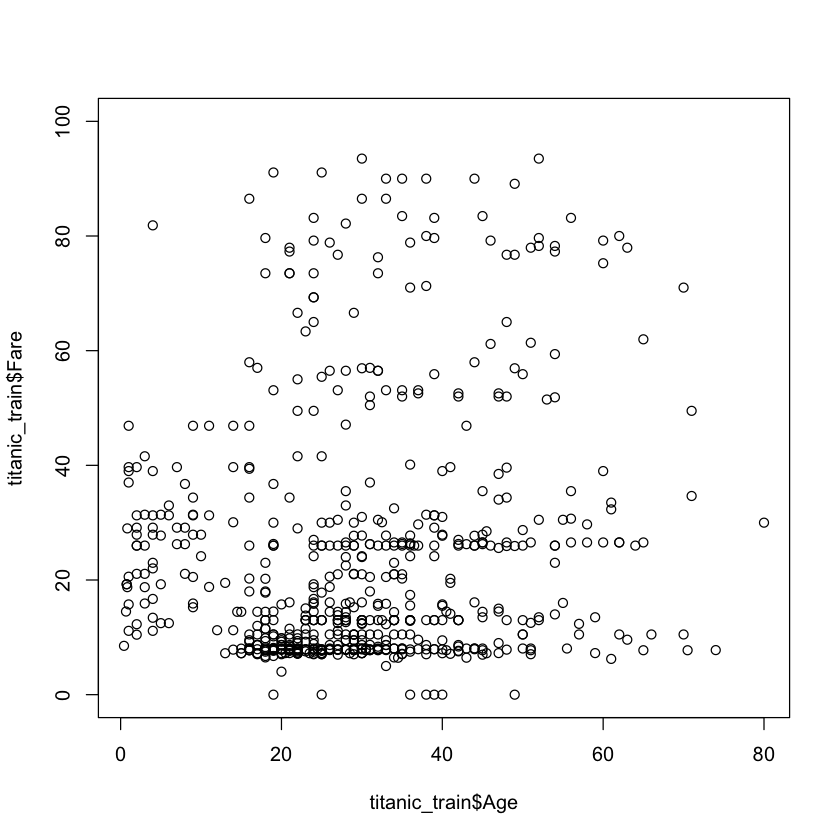

In [19]:
# 1 

titanic_train <- read.csv("../data/titanic/train.csv")

hist(titanic_train$Age, breaks=30)

# 2 

boxplot(titanic_train$Fare)

# 3

plot(titanic_train$Age, titanic_train$Fare, ylim = c(0,100))

